In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-spotify-songs-from-20102019-by-year/top10s.csv


In [2]:
df = pd.read_csv('/kaggle/input/top-spotify-songs-from-20102019-by-year/top10s.csv',encoding='ISO-8859-1')

In [3]:
df.head()

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  603 non-null    int64 
 1   title       603 non-null    object
 2   artist      603 non-null    object
 3   top genre   603 non-null    object
 4   year        603 non-null    int64 
 5   bpm         603 non-null    int64 
 6   nrgy        603 non-null    int64 
 7   dnce        603 non-null    int64 
 8   dB          603 non-null    int64 
 9   live        603 non-null    int64 
 10  val         603 non-null    int64 
 11  dur         603 non-null    int64 
 12  acous       603 non-null    int64 
 13  spch        603 non-null    int64 
 14  pop         603 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 70.8+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,603.0,302.000000,174.215384,1.0,151.5,302.0,452.5,603.0
year,603.0,2014.592040,2.607057,2010.0,2013.0,2015.0,2017.0,2019.0
bpm,603.0,118.545605,24.795358,0.0,100.0,120.0,129.0,206.0
nrgy,603.0,70.504146,16.310664,0.0,61.0,74.0,82.0,98.0
dnce,603.0,64.379768,13.378718,0.0,57.0,66.0,73.0,97.0
dB,603.0,-5.578773,2.798020,-60.0,-6.0,-5.0,-4.0,-2.0
live,603.0,17.774461,13.102543,0.0,9.0,12.0,24.0,74.0
val,603.0,52.225539,22.513020,0.0,35.0,52.0,69.0,98.0
dur,603.0,224.674959,34.130059,134.0,202.0,221.0,239.5,424.0
acous,603.0,14.326700,20.766165,0.0,2.0,6.0,17.0,99.0


In [6]:
df.shape

(603, 15)

In [7]:
df.isnull().sum()

Unnamed: 0    0
title         0
artist        0
top genre     0
year          0
bpm           0
nrgy          0
dnce          0
dB            0
live          0
val           0
dur           0
acous         0
spch          0
pop           0
dtype: int64

In [8]:
df.drop('Unnamed: 0', axis =1, inplace=True)

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
import plotly.express as px

In [11]:
df.rename(columns={'title':'song', 'artist':'artist', 'top genre':'genre', 'year':'year', 'bpm':'beats_per_minute','nrgy':'energy',
                    'dnce':'danceability','dB':'loudness','live':'liveness', 'val':'valence', 'dur':'length', 'acous':'acousticness',
                    'spch':'speechiness','pop':'popularity'}, inplace=True)

In [12]:
df.columns

Index(['song', 'artist', 'genre', 'year', 'beats_per_minute', 'energy',
       'danceability', 'loudness', 'liveness', 'valence', 'length',
       'acousticness', 'speechiness', 'popularity'],
      dtype='object')

In [13]:
df['genre'].nunique()

50

In [14]:
df['genre'].value_counts().head(10)

dance pop                    327
pop                           60
canadian pop                  34
barbadian pop                 15
boy band                      15
electropop                    13
british soul                  11
big room                      10
neo mellow                     9
canadian contemporary r&b      9
Name: genre, dtype: int64

Text(0.5, 1.0, 'Top 10 genre of 2010-2019')

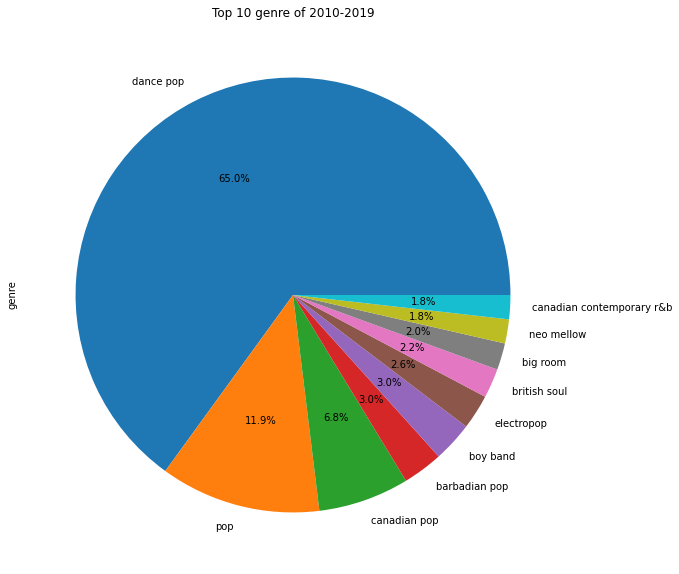

In [15]:
df['genre'].value_counts().head(10).plot.pie(figsize=(10,10),autopct='%1.1f%%')
plt.title('Top 10 genre of 2010-2019')

**Artists**

In [16]:
df['artist'].nunique()

184

In [17]:
df['artist'].value_counts().head(10)

Katy Perry          17
Justin Bieber       16
Rihanna             15
Maroon 5            15
Lady Gaga           14
Bruno Mars          13
Shawn Mendes        11
Ed Sheeran          11
Pitbull             11
The Chainsmokers    11
Name: artist, dtype: int64

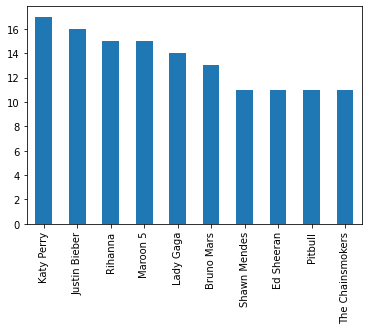

In [18]:
df['artist'].value_counts().head(10).plot.bar()

# **Distribution of featuers****

Text(0.5, 1.0, 'popularity')

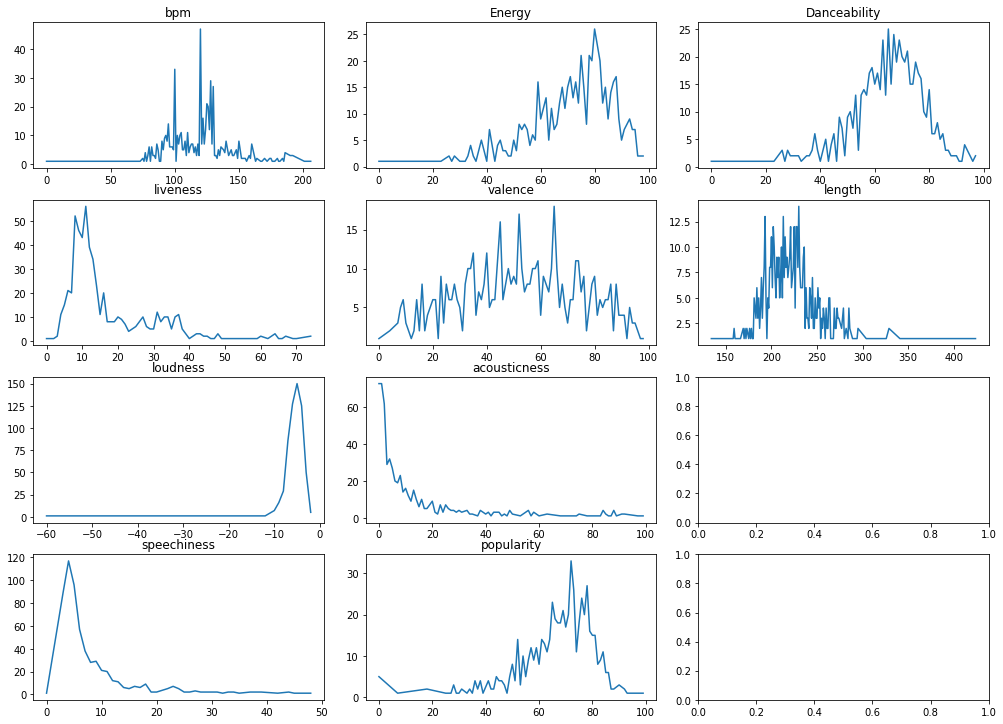

In [19]:
fig,axes = plt.subplots(nrows=4, ncols=3, figsize=(14,10))
plt.tight_layout()
axes[0][0].plot(df['beats_per_minute'].value_counts().sort_index())
axes[0][0].set_title('bpm')
axes[0][1].plot(df['energy'].value_counts().sort_index())
axes[0][1].set_title('Energy')
axes[0][2].plot(df['danceability'].value_counts().sort_index())
axes[0][2].set_title('Danceability')

axes[1][0].plot(df['liveness'].value_counts().sort_index())
axes[1][0].set_title('liveness')
axes[1][1].plot(df['valence'].value_counts().sort_index())
axes[1][1].set_title('valence')
axes[1][2].plot(df['length'].value_counts().sort_index())
axes[1][2].set_title('length')

axes[2][0].plot(df['loudness'].value_counts().sort_index())
axes[2][0].set_title('loudness')
axes[2][1].plot(df['acousticness'].value_counts().sort_index())
axes[2][1].set_title('acousticness')

axes[3][0].plot(df['speechiness'].value_counts().sort_index())
axes[3][0].set_title('speechiness')
axes[3][1].plot(df['popularity'].value_counts().sort_index())
axes[3][1].set_title('popularity')

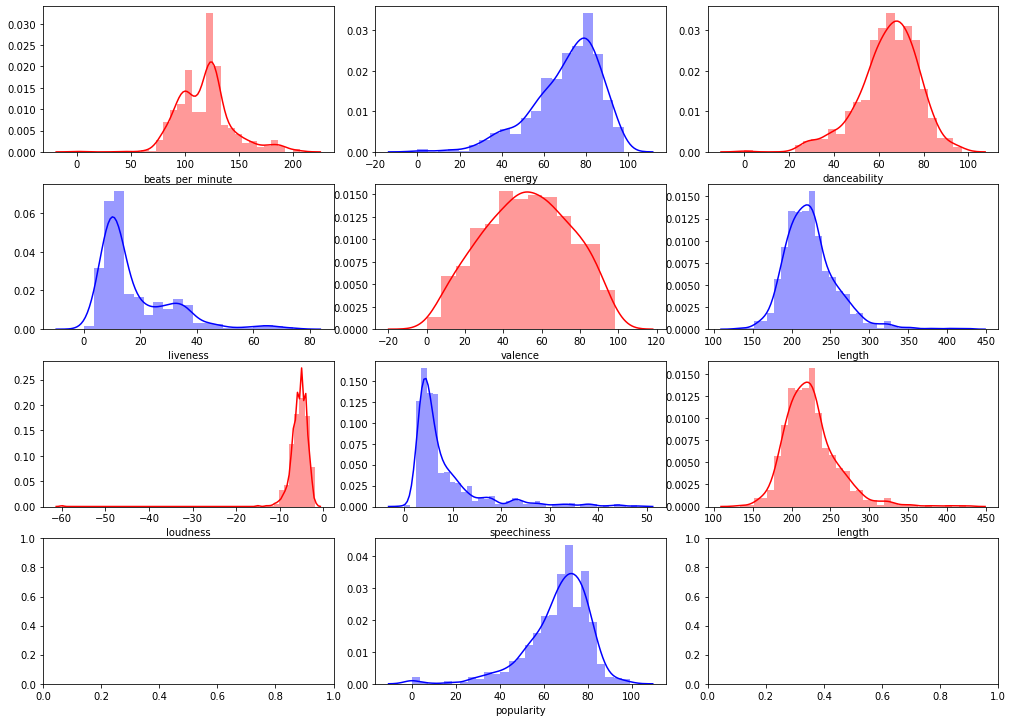

In [20]:
fig,axes = plt.subplots(nrows=4, ncols=3, figsize=(14,10))
plt.tight_layout()
sns.distplot(df['beats_per_minute'], color='r', ax=axes[0][0])
sns.distplot(df['energy'], color='b', ax=axes[0][1])
sns.distplot(df['danceability'], color='r', ax=axes[0][2])
sns.distplot(df['liveness'], color='b', ax=axes[1][0])
sns.distplot(df['valence'], color='r', ax=axes[1][1])
sns.distplot(df['length'], color='b', ax=axes[1][2])
sns.distplot(df['loudness'], color='r', ax=axes[2][0])
sns.distplot(df['speechiness'], color='b', ax=axes[2][1])
sns.distplot(df['length'], color='r', ax=axes[2][2]) 
sns.distplot(df['popularity'], color='b', ax=axes[3][1])

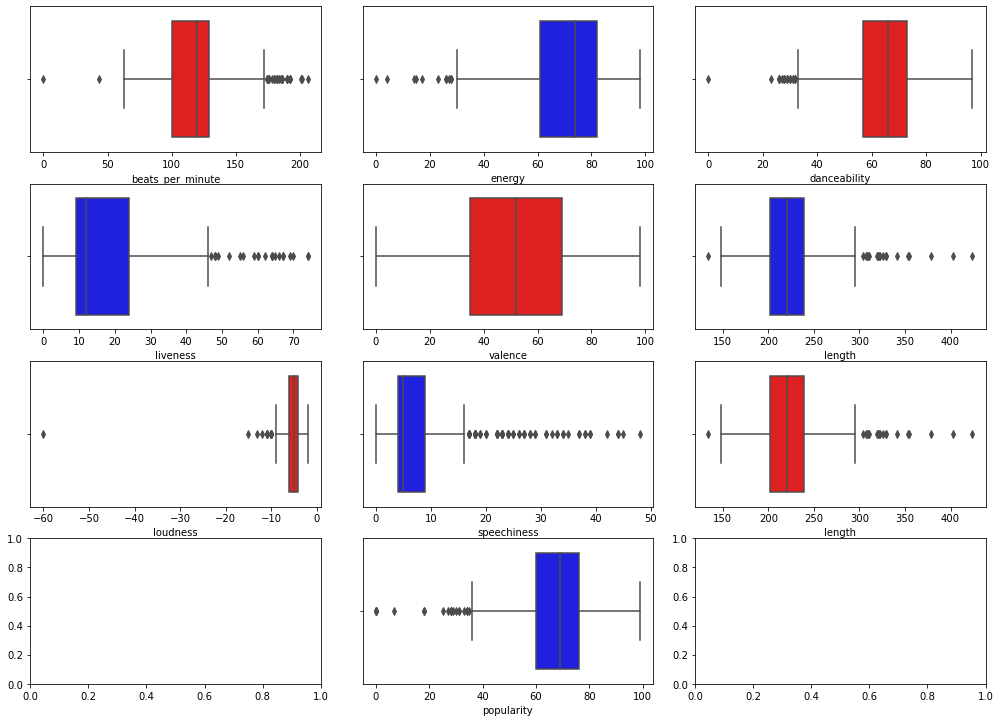

In [21]:
fig,axes = plt.subplots(nrows=4, ncols=3, figsize=(14,10))
plt.tight_layout()
sns.boxplot(df['beats_per_minute'], color='r', ax=axes[0][0])
sns.boxplot(df['energy'], color='b', ax=axes[0][1])
sns.boxplot(df['danceability'], color='r', ax=axes[0][2])
sns.boxplot(df['liveness'], color='b', ax=axes[1][0])
sns.boxplot(df['valence'], color='r', ax=axes[1][1])
sns.boxplot(df['length'], color='b', ax=axes[1][2])
sns.boxplot(df['loudness'], color='r', ax=axes[2][0])
sns.boxplot(df['speechiness'], color='b', ax=axes[2][1])
sns.boxplot(df['length'], color='r', ax=axes[2][2]) 
sns.boxplot(df['popularity'], color='b', ax=axes[3][1])

In [22]:
df.beats_per_minute.describe()

count    603.000000
mean     118.545605
std       24.795358
min        0.000000
25%      100.000000
50%      120.000000
75%      129.000000
max      206.000000
Name: beats_per_minute, dtype: float64

In [23]:
def grouping(x):
    if x<100:
        return '<100'
    elif x<=150:
        return '101-150'
    elif x<=200:
        return '151-200'
    else:
        return '>200'

groupes = df.beats_per_minute.apply(grouping)
values= groupes.value_counts()
labels= values.index
fig = px.pie(values = values,names= labels)
fig.update_layout(title = 'bpm_distribution')
fig.show()

Insights:
#### Most of the top songs are having 100-150 beats per minute(bpm)
#### Very few songs(only 3) are having bpm > 200

In [24]:
df[df['beats_per_minute']>200]

,song,artist,genre,year,beats_per_minute,energy,danceability,loudness,liveness,valence,length,acousticness,speechiness,popularity
200,How Ya Doin'? (feat. Missy Elliott),Little Mix,dance pop,2013,201,95,36,-3,37,51,211,9,48,50
276,FourFiveSeconds,Rihanna,barbadian pop,2015,206,27,58,-6,13,35,188,88,5,80
362,L.A.LOVE (la la),Fergie,dance pop,2015,202,39,48,-8,26,27,193,2,9,0


In [25]:
#fig = px.scatter(df[df['beats_per_minute']>200], y="beats_per_minute", x="popularity", hover_name='song', color='beats_per_minute', size='acousticness')
#fig.show()

Let's look into some good features, year wise
1. Danceability

In [26]:
fig=px.violin(df, y='danceability', color='year', points='all', hover_name='song', hover_data=['artist'])
fig.show()

Insights:

The two songs which are easier to dance are of two female hiphop artists, Nicki Minaj and CardiB.
CardiB's "Drip" released in 2018 is the song with highest danceability followed by Nicki Minaj's "Anaconda" in 2014.

Imagine Dragon's "Bad Liar" ia also the song with danceability equal to Drip, thus there are two songs with highest danceablity.

2. Popularity

In [27]:
fig=px.violin(df, y = 'popularity', points ='all',color='year',hover_name='song',hover_data=['artist'])
fig.show()

Insights:
It is very clear that Maroon5's "Memories" is the most popular song during the period of 2010-19.

3. Energy

In [28]:
fig=px.violin(df, y = 'energy', points ='all',color='year',hover_name='song',hover_data=['artist'])
fig.show()

Insights:
The most energetic song during this period is "Pom Pom" by Jonas Brothers

Let's look into the relationships between different variables

In [30]:
fig = px.scatter(df,x='danceability', y='energy',color='energy',hover_name='song',hover_data=['artist','year'])
fig.show()

Insights:
Danceability increases as energy increases.

"Pom Poms" by Jonas Brothers is the song with highest energy among the top songs during this period.

Even though the energy is less than half of the top songs, Bad Liar by Imagine Dragons is the song with highest danceability during 2010-19.

In [32]:
fig = px.scatter(df,x='popularity', y='length',color='length',hover_name='song',hover_data=['artist','year'])
fig.show()

Insights:
Most of the popular songs are with duration less than 4 minutes(250 seconds)

The song with highest duration is "TKO" by Justin Timberlake which is 7 minutes(424 seconds)

The song with least duration is "Mark my words" by Justin Bieber which is just 2.2 minutes(134 seconds)

In [33]:
fig = px.scatter(df,x='popularity', y='speechiness',color='speechiness',hover_name='song',hover_data=['artist','year'])
fig.show()

Insights:
The most popular songs contain less spoken words

The song with more spoken words is "How ya doin'?" by Little Mix feauturing Missy Elliot.

Lets have alook at 2019 data

In [35]:
fig = px.scatter(df.query('year==2019'), y='popularity', x='artist', hover_name='song', color='popularity' )
fig.show()

Insights:
Maroon5's "Memories" is the most popular song in 2019.

EdSheeran has 5 top songs in 2019.

Lets look at Pop genre

In [41]:
df[df['genre'].str.contains('pop')]

,song,artist,genre,year,beats_per_minute,energy,danceability,loudness,liveness,valence,length,acousticness,speechiness,popularity
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
5,Baby,Justin Bieber,canadian pop,2010,65,86,73,-5,11,54,214,4,14,77
6,Dynamite,Taio Cruz,dance pop,2010,120,78,75,-4,4,82,203,0,9,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
599,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
600,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
601,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69


In [46]:
fig = px.scatter(df[df['genre'].str.contains('pop')], x='artist', y='popularity', hover_name='song', hover_data=['year','artist'] )
fig.show()

The most popular Pop song on Spotify during 2010-19 was Maroon 5's Memories.

Let's get some insights from a particular artist

In [51]:
df['artist'].value_counts().head(10)

Katy Perry          17
Justin Bieber       16
Rihanna             15
Maroon 5            15
Lady Gaga           14
Bruno Mars          13
Shawn Mendes        11
Ed Sheeran          11
Pitbull             11
The Chainsmokers    11
Name: artist, dtype: int64

In [52]:
kp = df[df['artist']=='Katy Perry']
kp

,song,artist,genre,year,beats_per_minute,energy,danceability,loudness,liveness,valence,length,acousticness,speechiness,popularity
28,Teenage Dream,Katy Perry,dance pop,2010,120,80,72,-5,13,59,228,2,4,63
29,California Gurls,Katy Perry,dance pop,2010,125,75,79,-4,18,40,235,0,5,62
77,E.T.,Katy Perry,dance pop,2011,152,87,62,-5,37,76,230,2,18,66
101,Last Friday Night (T.G.I.F.),Katy Perry,dance pop,2011,126,81,65,-4,67,72,231,0,4,27
102,Firework,Katy Perry,dance pop,2011,124,83,64,-5,11,65,228,14,5,25
124,Part Of Me,Katy Perry,dance pop,2012,130,92,68,-5,7,77,216,0,4,71
127,Wide Awake,Katy Perry,dance pop,2012,160,68,51,-5,39,57,221,7,4,68
128,The One That Got Away,Katy Perry,dance pop,2012,134,80,69,-4,16,88,227,0,4,67
144,Roar,Katy Perry,dance pop,2013,180,77,55,-5,35,46,224,0,4,78
216,Dark Horse,Katy Perry,dance pop,2014,132,59,65,-6,17,35,216,0,5,78


In [55]:
df[df['artist']=='Katy Perry']['year'].value_counts()

2014    3
2012    3
2011    3
2017    3
2010    2
2015    1
2013    1
2016    1
Name: year, dtype: int64

In [58]:
fig=px.scatter(df[df['artist']=='Katy Perry'], y='popularity', x= 'year', hover_name='song', hover_data=['artist','year'])
fig.show()

Let's look into top songs based on different features

Top 10 songs based on acousticness

In [63]:
df.sort_values(by='acousticness', ascending = False).head(10)[['song','artist','genre','year','acousticness']]

,song,artist,genre,year,acousticness
431,Start,John Legend,neo mellow,2016,99
255,Not About Angels,Birdy,neo mellow,2014,97
186,Clown,Emeli Sandé,dance pop,2013,92
210,All of Me,John Legend,neo mellow,2014,92
96,Turning Page,Sleeping At Last,acoustic pop,2011,91
436,Beautiful Birds (feat. Birdy),Passenger,folk-pop,2016,91
52,Someone Like You,Adele,british soul,2011,89
330,Mark My Words,Justin Bieber,canadian pop,2015,88
276,FourFiveSeconds,Rihanna,barbadian pop,2015,88
398,All I Ask,Adele,british soul,2016,88


In [64]:
df.sort_values(by='liveness',ascending=False).head(10)[['song','artist','genre','year','liveness']]

,song,artist,genre,year,liveness
400,NO,Meghan Trainor,dance pop,2016,74
581,Good as Hell (feat. Ariana Grande) - Remix,Lizzo,escape room,2019,74
12,Cooler Than Me - Single Mix,Mike Posner,dance pop,2010,70
354,Time of Our Lives,Pitbull,dance pop,2015,69
63,Monster,Kanye West,chicago rap,2011,67
101,Last Friday Night (T.G.I.F.),Katy Perry,dance pop,2011,67
175,Play Hard (feat. Ne-Yo & Akon) - New Edit,David Guetta,dance pop,2013,66
42,Hard,Rihanna,barbadian pop,2010,65
292,Don't,Ed Sheeran,pop,2015,64
559,Walk On Water (feat. Beyoncé),Eminem,detroit hip hop,2018,64


# **List of cool insights:**


There are 50 unique genres in the top spotify songs from 2010-19.

During this timeperiod, most of the top songs belongs to the pop genre.

And in particular, dance-pop is the top genre on Spotify during this period.

There are 184 unique artists whose songs reached top in the charts on Spotify in the timeperiod of 2010-19.

Katy Perry has most number of top songs on Spotify in the period of 2010-19 followed by Justin Bieber .

Most of the top songs are having 100-150 beats per minute(bpm)

Very few songs are having bpm > 200

Only 3 songs are having bpm > 200 (you can see the value if you hover the pie chart above)

Just out of curiosity, Let's see what are those 3 songs with bpm>200

Rihanna's FourFiveSeconds is the song with highest bpm

The two songs which are easier to dance are of two female hiphop artists, Nicki Minaj and CardiB.

CardiB's "Drip" released in 2018 is the song with highest danceability followed by Nicki Minaj's "Anaconda" in 2014.

Imagine Dragon's "Bad Liar" ia also the song with danceability equal to Drip, thus there are two songs with highest danceablity.

Maroon5's "Memories" is the most popular song during the period of 2010-19.

The most energetic song during this period is "Hello" by French DJ, Martin Solveig.

Danceability increases as energy increases.

"Pom Poms" by Jonas Brothers is the song with highest energy among the top songs during this period.

Even though the energy is less than half of the top songs, Bad Liar by Imagine Dragons is the song with highest danceability during 2010-19.

The most of the popular songs are with duration less than 4 minutes(250 seconds)

The song with highest duration is "TKO" by Justin Timberlake which is 7 minutes(424 seconds)

The song with least duration is "Mark my words" by Justin Bieber which is just 2.2 minutes(134 seconds)

The most popular songs contain less spoken words

The song with more spoken words is "How ya doin'?" by Little Mix featuring Missy Elliot.

Maroon5's "Memories" is the most popular song in 2019.

EdSheeran has 5 top songs in 2019.

My bad, only 14 hiphop songs :(

The most popular hip hop song on Spotify during 2010-19 was Eminem's "Love the way you lie".

It seems that 2015 is very lucky for Justin Bieber as he had 9 top singles.

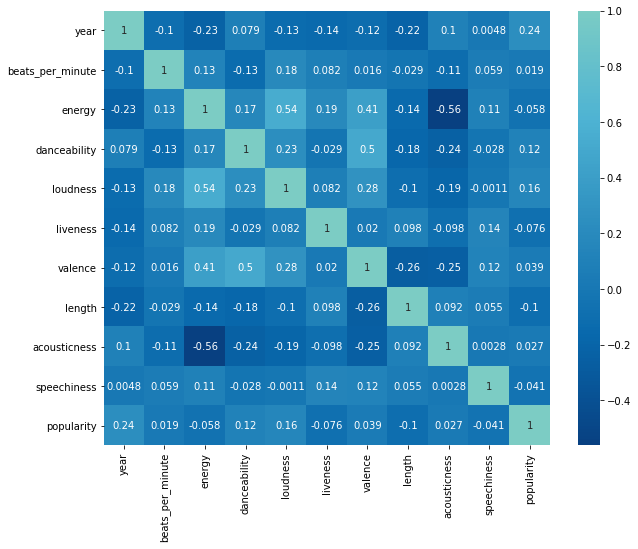

In [69]:
corrr = df.corr()
fig=plt.figure(figsize=(10,8))
sns.heatmap(corrr, annot=True,cmap='GnBu_r', center=1)